<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Python: Projeto Final

**Autor:** Júlia Caroline Araújo da Silva<br>
**Data de entrega:** 09 de maio de 2024<br>
**Última atualização:** 11 de março de 2025

---

## Índice

- [1. Breve descrição do problema ](#breve-descrição-do-problema)
- [2. Código de importação de bibliotecas](#código-de-importação-de-biblioteca)
- [3. Código de download/ carregamento/ geração de dados](#código-de-download-carregamento-geração-de-dados)
- [4. Etapa de exploração](#etapa-de-exploração)
    > - [4.1. Estrutura](#estrutura)
    > - [4.2. Schema](#schema)
    > - [4.3. Dados faltantes](#dados-faltantes)
- [5. Etapa de limpeza e transformação](#etapa-de-limpeza-e-transformação)
    > - [5.1. Correção de schema](#correção-schema)
- [6. Etapa de análise e visualização dos dados](#etapa-de-análise-e-visualização-dos-dados)
    > - [6.1. Escolaridade](#escolaridade)
    > - [6.2. Salário anual](#salario-anual)
    > - [6.3. Tipo de cartão contratado](#tipo-de-cartão-contratado)
    > - [6.4. Meses de relacionamento](#meses-de-relacionamento)
    > - [6.5.Quantidade de produtos](#quantidade-de-produtos)
    > - [6.6. Iterações nos últimos 12 meses](#iterações-nos-últimos-12-meses)
    > - [6.7. Meses inativos em 1 ano](#meses-inativos-em-1-ano)
    > - [6.8. Limite de crédito](#limite-de-crédito)
    > - [6.9. Valor das transações em 1 ano](#valor-das-transações-em-1-ano)
    > - [6.10. Quantidade de transações em 1 ano](#quantidade-de-transações-em-1-ano)
    > - [6.11. Quantidade de transações x Valor das transações](#quantidade-de-transações-x-valor-das-transações)
- [7. Resumo dos insights](#resumo-dos-insights)

# **1. Breve descrição do problema**

O projeto final do curso de Python consiste na exploração, manipulação, limpeza e vizualização de dados de crédito do arquivo `Python_M10_support material.csv` disponibilizado na plataforma do curso. Essa base de dados também pode ser acessada através deste [link](https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv).

Os dados estão no formato `csv`e apresentam informações sobre clientes de uma instituição financeira. Neste caso, apenas a coluna `default`irá interessar, sendo ela a que indica se o cliente está adimplente (default == 0) ou inadimplente (default == 1). Desse modo, o objetivo principal deste exercício é compreender o motivo de um cliente contrair dividas baseando-se em certos atributos.



Abaixo está uma descrição completa dos demais atributos:

| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |

# **2. Código de importação de bibliotecas**

O código de importação das bibliotecas utilizadas está logo abaixo:

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

# **3. Código de download/ carregamento/ geração de dados**


O arquivo do banco de dados para a análise encontra-se na linha de código abaixo, sendo 'na' o indetificador dos dados faltantes.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/develop/dataset/credito.csv', na_values='na')

# **4. Etapa de exploração**

Nesta etapa, a exploração dos dados visa compreender o percentual de inadimplência, os tipos de dados e os dados faltantes.

### **4.1. Estrutura**

In [ ]:
# Retornar uma tupla do dataframe (quantidade de linhas e colunas)
df.shape

(10127, 16)

In [ ]:
# Extrair o shape do dataframe filtrado da quantidade de clientes adimplentes
df[df['default'] == 0].shape

(8500, 16)

In [ ]:
# Extrair o shape do dataframe filtrado da quantidade de clientes inadimplentes
df[df['default'] == 1].shape

(1627, 16)

In [ ]:
# Verificar a relação proporcional de clientes adimplentes e inadimplentes
qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(f"A proporção de clientes adimplentes é de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A proporção de clientes inadimplentes é de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")

A proporção de clientes adimplentes é de 83.93%
A proporção de clientes inadimplentes é de 16.07%


### **4.2. Schema**

In [ ]:
# Visualizar as primeiras linhas do dataframe
df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [ ]:
# Vizualizar os tipos de variáveis de cada coluna e seus respectivos dados
df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


Nota-se que os tipos de dados referentes às colunas `limite_credito` e `valor_transacoes_12m` são retratados como ' object '. Desse modo, será necessário corrigi-los para o tipo ' float '.

In [ ]:
# Visualizar as estatística descritivas dos dados do tipo 'object' que são atributos categóricos
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [ ]:
# Remover a coluna 'id' do dataframe e visualizar as estatísticas descritivas dos dados do tipo 'number'
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


### **4.3. Dados faltantes**

In [ ]:
# Visualizar os dados faltantes no dataframe e retornar um valor booleano, onde 'True' corresponde aos valores nulos 'NaN' na tabela
df.isna().any()

,0
id,False
default,False
idade,False
sexo,False
dependentes,False
escolaridade,True
estado_civil,True
salario_anual,True
tipo_cartao,False
meses_de_relacionamento,False


As colunas `escolaridade`,`estado_civil` e `salario_anual` apresentam dados faltantes.

In [ ]:
# Função para extrair a estatística dos dados faltantes
def stats_dados_faltantes(df: pd.DataFrame) -> None:

  stats_dados_faltantes = []
  for col in df.columns:
    if df[col].isna().any():
      qtd, _ = df[df[col].isna()].shape
      total, _ = df.shape
      dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
      stats_dados_faltantes.append(dict_dados_faltantes)

  for stat in stats_dados_faltantes:
    print(stat)

stats_dados_faltantes(df=df)

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [ ]:
# Percentual dos dados faltantes dos clientes adimplentes
stats_dados_faltantes(df=df[df['default'] == 0])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}


In [ ]:
# Percentual dos dados faltantes dos clientes inadimplentes
stats_dados_faltantes(df=df[df['default'] == 1])

{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# **5. Etapa de limpeza e transformação**

Nesta etapa, será realizada a exclusão dos dados faltantes e a transformação dos dados das colunas `limite_credito` e `valor_transacoes_12m`.

### **5.1. Correção de schema**

In [ ]:
# Verificar o tipo de dado referente às colunas 'limite_credito' e 'valor_transacoes_12m'
df[['limite_credito','valor_transacoes_12m']].dtypes

,0
limite_credito,object
valor_transacoes_12m,object


In [ ]:
# Visualizar os valores contidos nas colunas de interesse
df[['limite_credito','valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


In [ ]:
# Função lambda para limpar os dados
fn = lambda valor: float(valor.replace(".", "").replace(",", "."))

df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn)
df['limite_credito'] = df['limite_credito'].apply(fn)

df.dtypes

,0
id,int64
default,int64
idade,int64
sexo,object
dependentes,int64
escolaridade,object
estado_civil,object
salario_anual,object
tipo_cartao,object
meses_de_relacionamento,int64


In [ ]:
# Exluir os dados faltantes
# Comparar o percentual de clientes adimplentes e inadimplentes na nova base de dados e na base de dados original
df.dropna(inplace=True)

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(f"A proporcão da base original de clientes adimplentes era de {round(100 * qtd_adimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes adimplentes é de {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}%")
print("")
print(f"A proporcão da base original de clientes inadimplentes era de {round(100 * qtd_inadimplentes / qtd_total, 2)}%")
print(f"A nova proporcão de clientes inadimplentes é de {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}%")

A proporcão da base original de clientes adimplentes era de 83.93%
A nova proporcão de clientes adimplentes é de 84.28%

A proporcão da base original de clientes inadimplentes era de 16.07%
A nova proporcão de clientes inadimplentes é de 15.72%


# **6. Etapa de análise e vizualização dos dados**

Nesta estapa, o objetivo principal desse projeto será realizado, isto é, analisar os dados de cada atributo do dataframe e correlacioná-los entre si para a obtenção de insights sobre a inadimplência dos clientes do banco.

In [ ]:
# Separar os clientes adimplentes e inadimplentes
df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

### **6.1. Escolaridade**

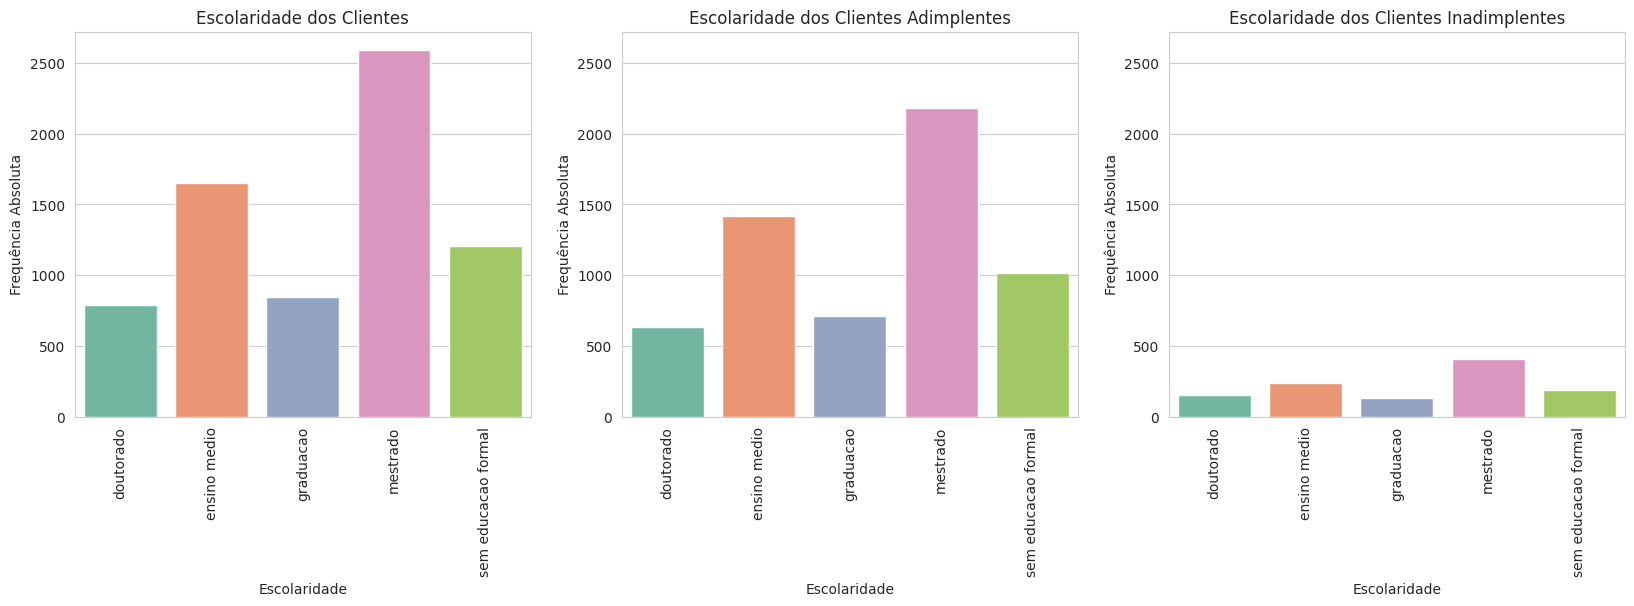

In [ ]:
# Analisar a escolaridade
coluna = 'escolaridade'
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']

eixo = 0
max_y = 0
max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo], hue=coluna, palette="Set2", legend=False)
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  # Define os ticks e os rótulos corretamente
  ticks = range(len(df_to_plot[coluna]))  # Define os ticks com base no número de categorias
  f.set_xticks(ticks)  # Define os ticks no eixo x
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)  # Define os rótulos

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* A maior parte dos clientes do banco possuem ensino superior (graduação, mestrado e doutorado). No entanto, a quantidade de clientes sem educação formal também forma uma parte significativa do perfil de escolaridade dos clientes.

* Nota-se também que os clientes que possuem mestrado são os que compõem o maior grupo de adimplentes, mas também de inadimplentes.

### **6.2. Salário anual**

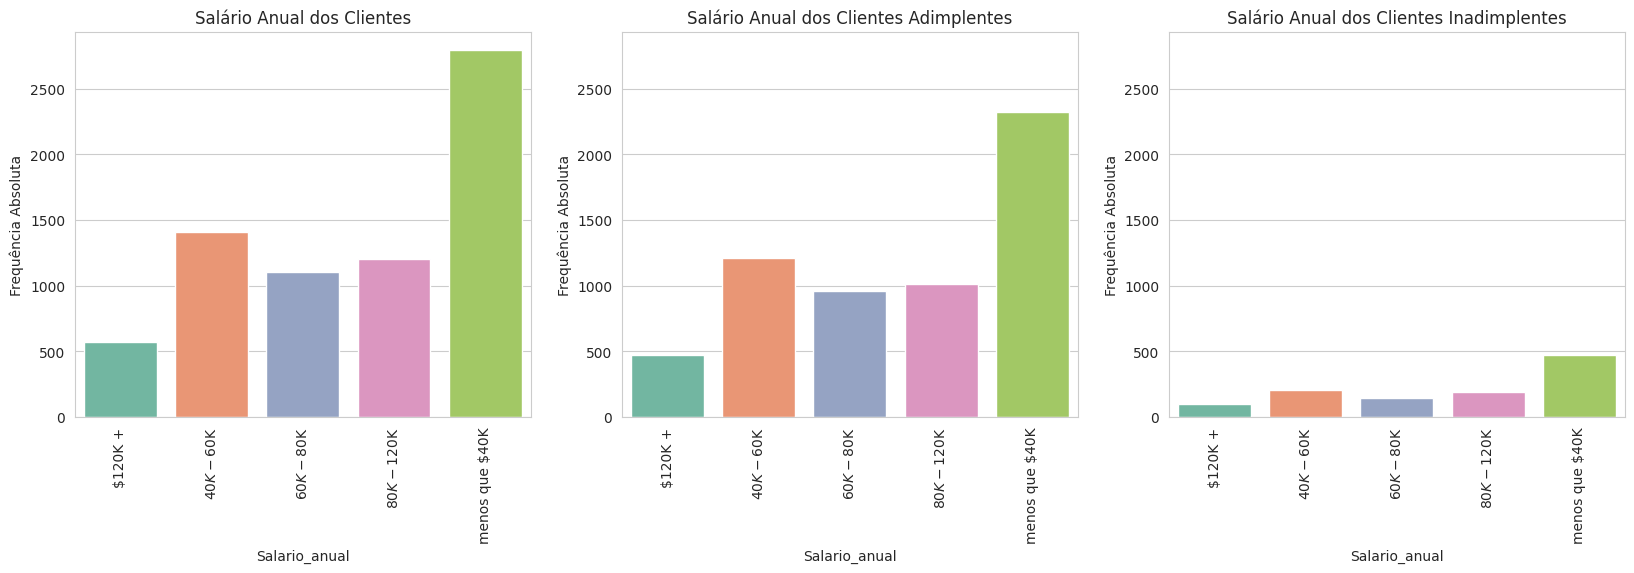

In [ ]:
# Analisar a faixa de salário anual
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo], hue=coluna, palette="Set2", legend=False)
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  # Define os ticks e os rótulos corretamente
  ticks = range(len(df_to_plot[coluna]))  # Define os ticks com base no número de categorias
  f.set_xticks(ticks)  # Define os ticks no eixo x
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)  # Define os rótulos

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* A faixa salarial predominante é a de menos 40k ao ano. Isso vale para o número total de clientes, assim como para os clientes adimplentes e inadimplentes respectivamente.

### **6.3. Tipo de cartão contratado**

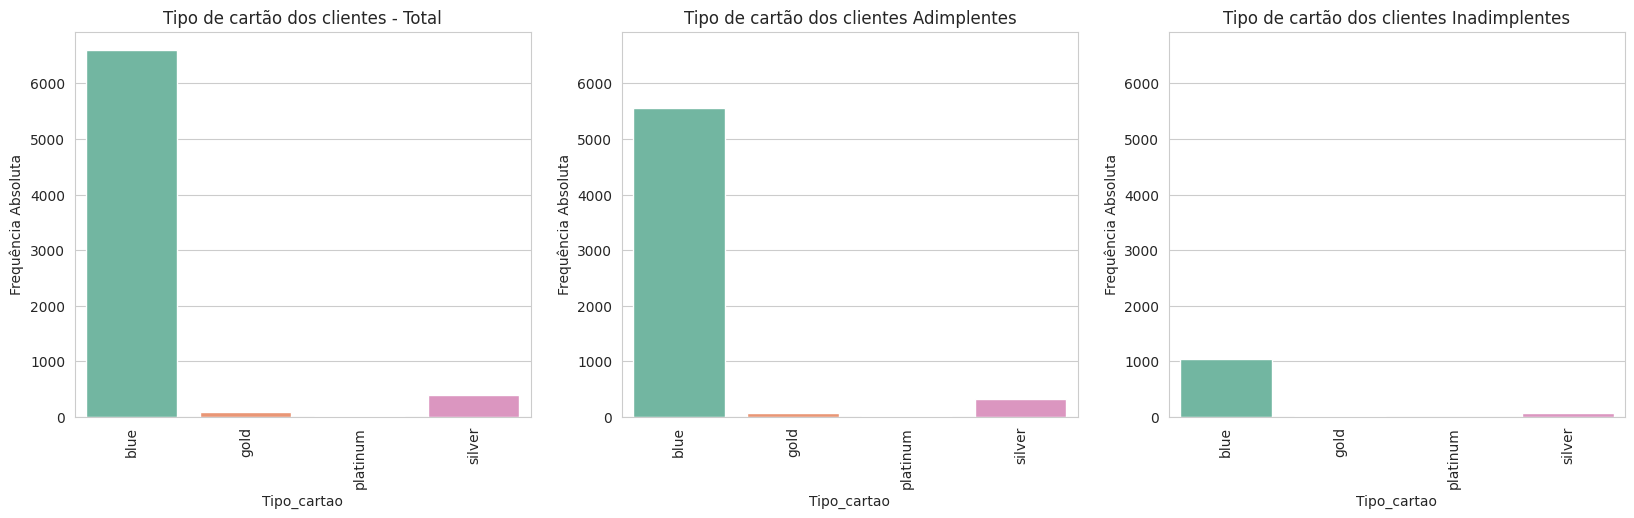

In [ ]:
# Analisar o tipo de cartão contratado
coluna = 'tipo_cartao'
titulos = ['Tipo de cartão dos clientes - Total','Tipo de cartão dos clientes Adimplentes','Tipo de cartão dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  df_to_plot = dataframe[coluna].value_counts().reset_index()
  df_to_plot.columns = [coluna, 'frequencia_absoluta']
  df_to_plot.sort_values(by=[coluna], inplace=True)

  f = sns.barplot(x=coluna, y='frequencia_absoluta', data=df_to_plot, ax=eixos[eixo], hue=coluna, palette="Set2", legend=False)
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
  # Define os ticks e os rótulos corretamente
  ticks = range(len(df_to_plot[coluna]))  # Define os ticks com base no número de categorias
  f.set_xticks(ticks)  # Define os ticks no eixo x
  f.set_xticklabels(labels=df_to_plot[coluna], rotation=90)  # Define os rótulos

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()



* O tipo de cartão marjoritariamente contratado é o tipo blue.
* Nota-se, também, que os clientes inadimplentes não possuem cartão do tipo gold.

### **6.4. Meses de relacionamento**

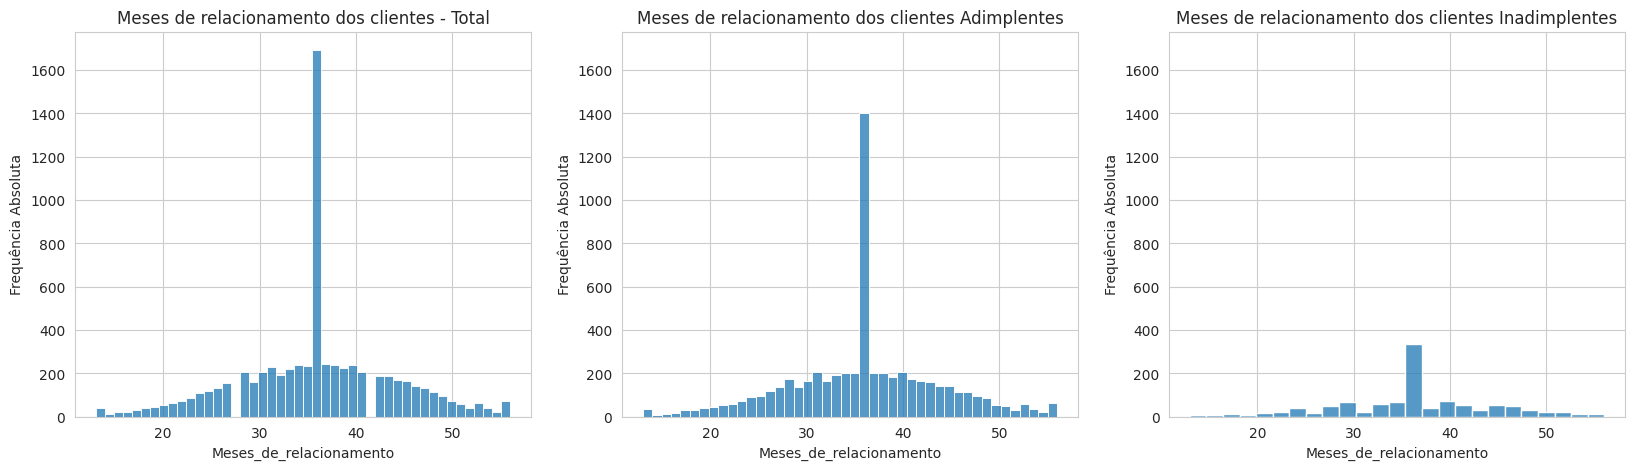

In [ ]:
# Analisar os meses de relacionamento
coluna = 'meses_de_relacionamento'
titulos = ['Meses de relacionamento dos clientes - Total', 'Meses de relacionamento dos clientes Adimplentes', 'Meses de relacionamento dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* O tempo de relacionamento dos clientes se concentra entre 36 meses, tanto para os clientes adimplentes como para os inadimplentes.

### **6.5.Quantidade de produtos**

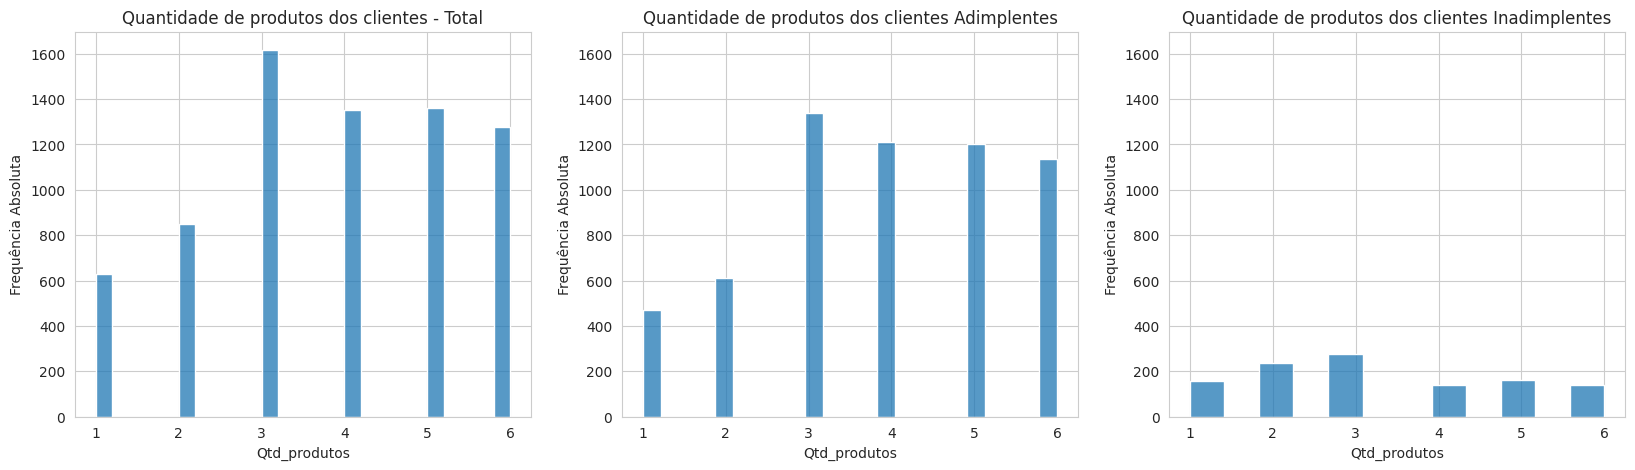

In [ ]:
# Analisar a quantidade de produtos
coluna = 'qtd_produtos'
titulos = ['Quantidade de produtos dos clientes - Total', 'Quantidade de produtos dos clientes Adimplentes', 'Quantidade de produtos dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* A quantidade de produtos dos clientes é mais evidente nos valores 3, 4 e 5, sem apresentar uma variação significativa entre os dois últimos.

### **6.6. Iterações nos últimos 12 meses**

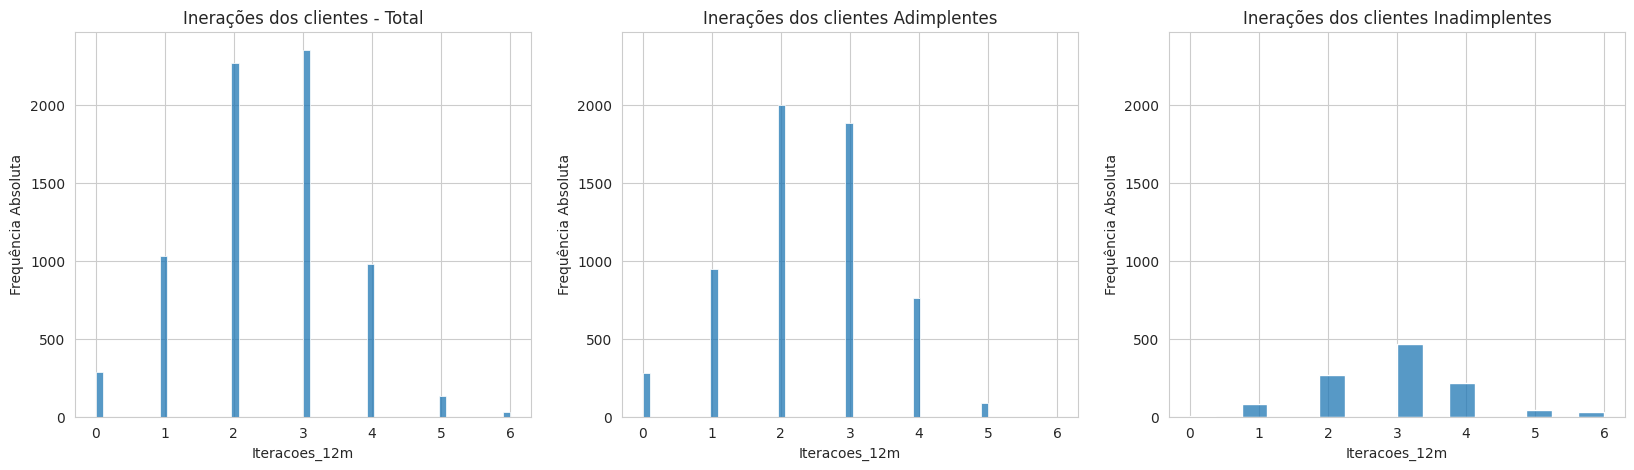

In [ ]:
# Analisar as iterações nos últimos 12 meses
coluna = 'iteracoes_12m'
titulos = ['Inerações dos clientes - Total', 'Inerações dos clientes Adimplentes', 'Inerações dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* O maior número de iterações dos clientes se deu entre o segundo e o terceiro mês.

### **6.7. Meses inativos em 1 ano**

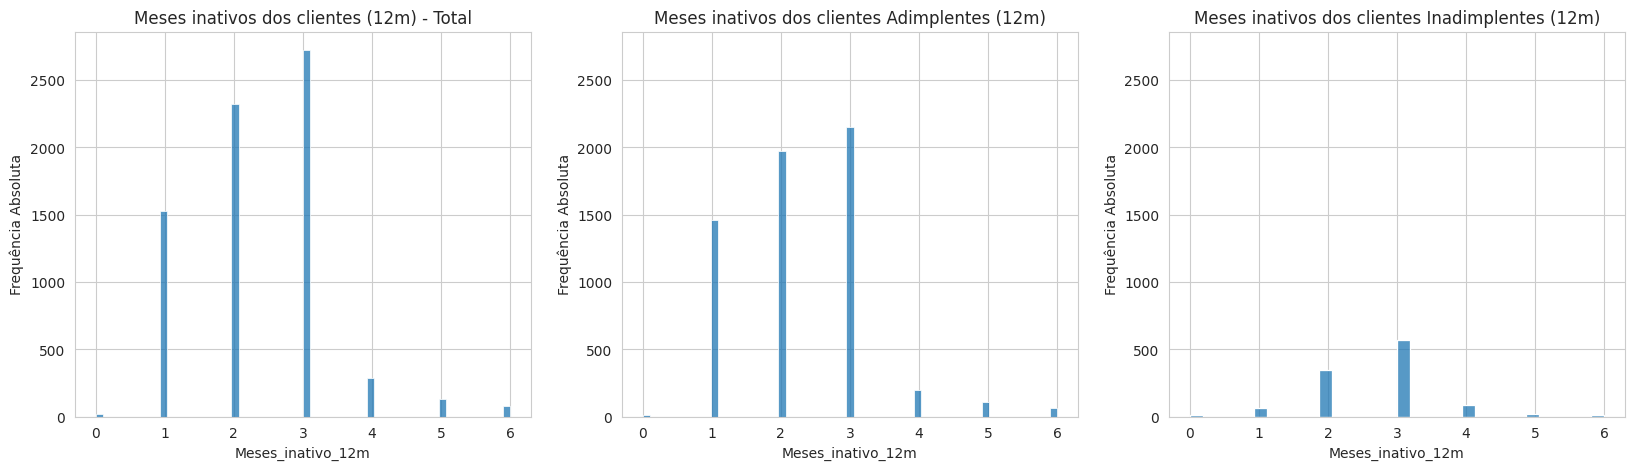

In [ ]:
# Analisar os meses inativos em 1 ano
coluna = 'meses_inativo_12m'
titulos = ['Meses inativos dos clientes (12m) - Total', 'Meses inativos dos clientes Adimplentes (12m)', 'Meses inativos dos clientes Inadimplentes (12m)']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* O terceiro mês configura-se como o mês com maior número de clientes inativos.

### **6.8. Limite de crédito**

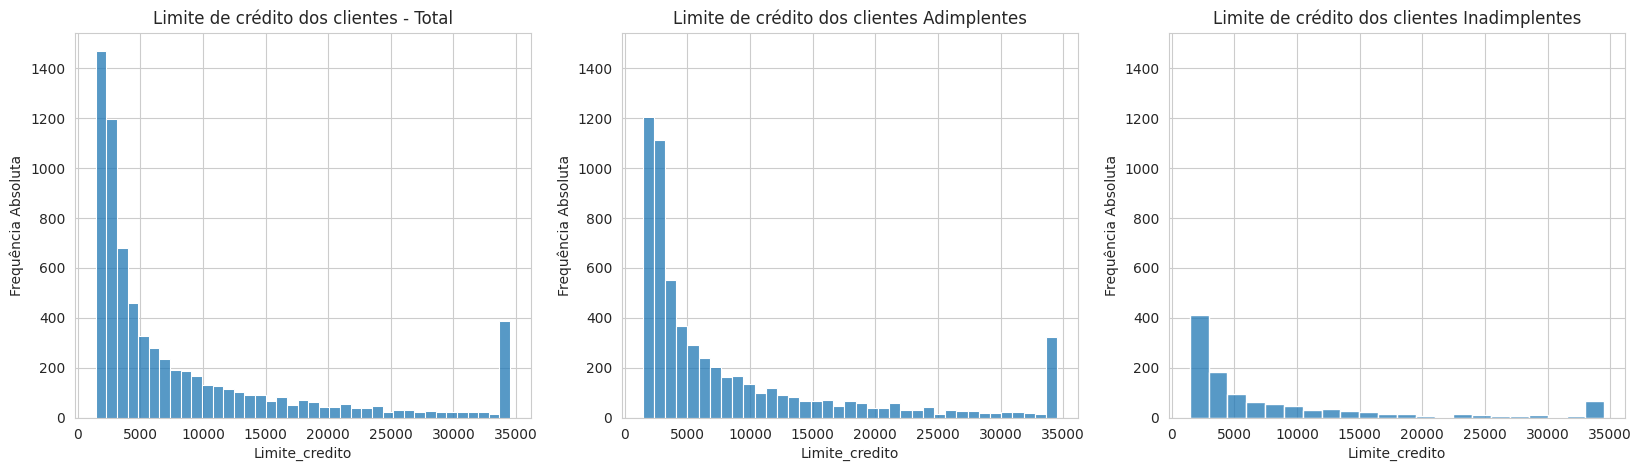

In [ ]:
# Analisar os limites de crédito
coluna = 'limite_credito'
titulos = ['Limite de crédito dos clientes - Total', 'Limite de crédito dos clientes Adimplentes', 'Limite de crédito dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* O gráfico de limite de crédito apresenta uma alta taxa em 5.000, mas essa taxa diminui conforme o valor aumenta. Entretanto, a taxa de crédito volta a crescer novamente quando alcança o valor de 35.000.

### **6.9. Valor das transações em 1 ano**

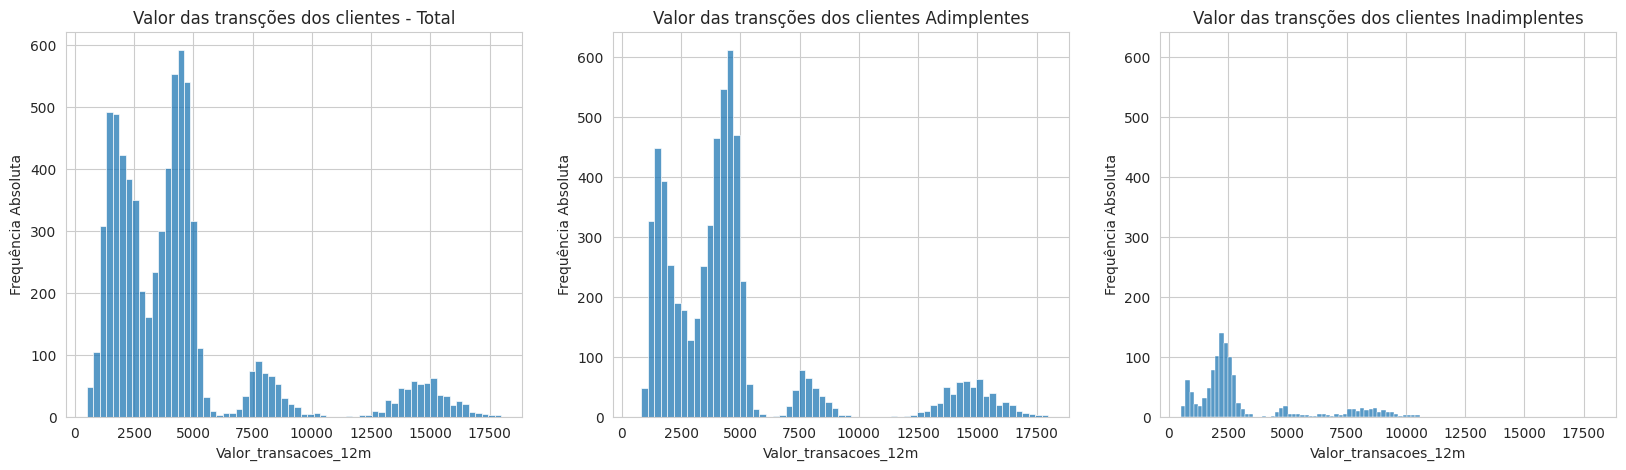

In [ ]:
# Analisar os valores das transações nos últimos 12 meses
coluna = 'valor_transacoes_12m'
titulos = ['Valor das transções dos clientes - Total', 'Valor das transções dos clientes Adimplentes', 'Valor das transções dos clientes Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* O valor das transações apesenta um maior volume entre os valores de 2.500 e 5.000. No entanto, entre os cliente adimplentes, o maior volume de transações concentra-se no valor de 5.000, enquanto que os clientes inadimplentes realizam mais transações no valor de 2.500.

### **6.10. Quantidade de transações em 1 ano**

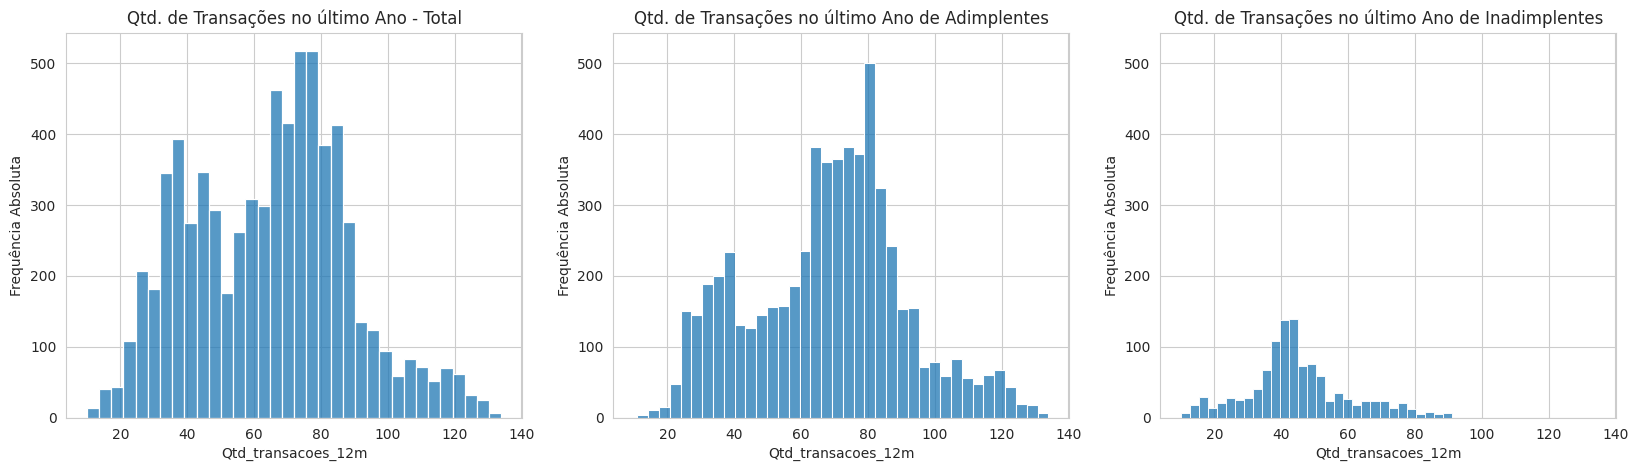

In [ ]:
# Analisar a quantidade de transações nos últimos 12 meses
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no último Ano - Total', 'Qtd. de Transações no último Ano de Adimplentes', 'Qtd. de Transações no último Ano de Inadimplentes']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

for dataframe in [df, df_adimplente, df_inadimplente]:

  f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
  f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

  _, max_y_f = f.get_ylim()
  max_y = max_y_f if max_y_f > max_y else max_y
  f.set(ylim=(0, max_y))

  eixo += 1

figura.show()

* A quantidade de transações é maior entre 20-40 e 60-80. No entanto, tratando-se dos clientes inadimplentes, a maior quantidade de transações concentra-se entre 40-60.

### **6.11. Quantidade de transações x Valor das transações**

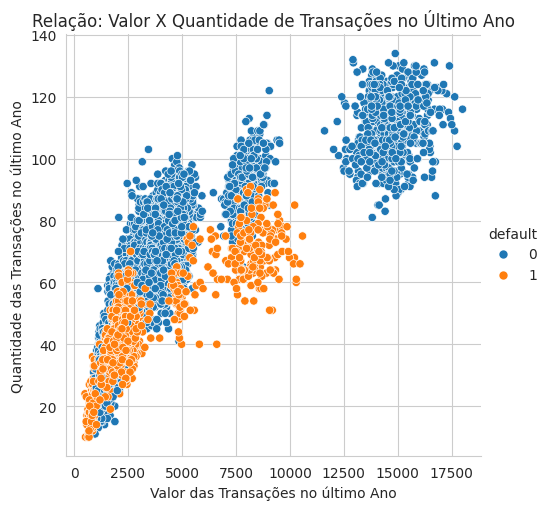

In [ ]:
# Analisar a correlação entre a quantidade de transações e o valor das transações
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(title='Relação: Valor X Quantidade de Transações no Último Ano', xlabel='Valor das Transações no último Ano', ylabel='Quantidade das Transações no último Ano')


* Os clientes inadimplentes não fazem parte do grupo que possuem maiores valores e maiores quantidades de transações. Sendo estes, portanto, os que possuem menos quantidade de transações e transações feitas em menores valores.

# **7. Resumo dos insights**

Em função dos gráficos apresentados, faz-se necessário extrair alguns insights sobre os dados que foram vizualizados. Desse modo, pode-se afirmar que alguns atributos do dataframe podem ser desconsiderados  nessa análise, por não apresentarem uma variação significativa em seus valores. Entre eles estão: `escolaridade`, `salário_anual`, `tipo_cartão`, `idade`, `dependentes`, `meses_de_relacionamento`, `meses_inativo_12m` e `limite_credito`.

Diante disso, os demais atributos se destacaram perante os outros, como `estado_civil` que, por sua vez, demonstrou que os clientes inadimplentes tendem a ser solteiros. Do mesmo modo, os atributos `valor_transacoes_12m` e `qtd_transacoes_12m` demonstraram que quanto maior o valor e a quantidade de transações, menor são as chances de inadimplência. Além disso, a `qtd_produtos` e `iteracoes_12m` mostraram que os clientes inadimplentes possuem até três, dos seis produtos ofertados pelo banco e realizaram mais iterações, enquanto os clientes adimplentes realizaram menos iterações e possuem mais produtos ofertados pelo banco.